In [ ]:
# !pip install wolta

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,FunctionTransformer,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import wolta as wlt

In [2]:
data = pd.read_csv("LoanDataset.csv")
data.sample(5)

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
30527,30523.0,37,57552,MORTGAGE,0.0,DEBTCONSOLIDATION,A,"£15,000.00",9.63,7,N,12,NO DEFAULT
17338,17335.0,25,38000,RENT,9.0,EDUCATION,A,"£4,800.00",11.71,5,NaN,3,NO DEFAULT
18015,18012.0,32,63235,RENT,3.0,HOMEIMPROVEMENT,B,"£25,000.00",10.25,2,N,8,DEFAULT
15743,15740.0,25,62000,RENT,7.0,DEBTCONSOLIDATION,A,"£15,600.00",7.49,5,NaN,4,NO DEFAULT
13348,13347.0,25,90000,MORTGAGE,6.0,PERSONAL,A,"£6,000.00",7.74,5,NaN,4,NO DEFAULT


In [3]:
# from wolta.data_tools import load_by_parts
# df1 = load_by_parts("LoanDataset.csv",strategy='efficient')
# df1

In [4]:
df  = data.copy()
df.drop(columns=['customer_id'],inplace=True)
df.isnull().mean().sort_values()

customer_age           0.000000
customer_income        0.000000
home_ownership         0.000000
loan_intent            0.000000
loan_grade             0.000000
term_years             0.000000
cred_hist_length       0.000000
loan_amnt              0.000031
Current_loan_status    0.000123
employment_duration    0.027466
loan_int_rate          0.095624
historical_default     0.636378
dtype: float64

In [5]:
# from wolta.data_tools import col_types 
# col_types(df,print_columns=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32586 entries, 0 to 32585
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_age         32586 non-null  int64  
 1   customer_income      32586 non-null  object 
 2   home_ownership       32586 non-null  object 
 3   employment_duration  31691 non-null  float64
 4   loan_intent          32586 non-null  object 
 5   loan_grade           32586 non-null  object 
 6   loan_amnt            32585 non-null  object 
 7   loan_int_rate        29470 non-null  float64
 8   term_years           32586 non-null  int64  
 9   historical_default   11849 non-null  object 
 10  cred_hist_length     32586 non-null  int64  
 11  Current_loan_status  32582 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 3.0+ MB


- Converting `customer_income` and `loan_amount` to numeric type

In [7]:
df['loan_amnt'] = df['loan_amnt'].str.replace("£","").str.replace(",","").astype(float)
df['customer_income'] = df['customer_income'].str.replace(",","").astype(int)
df['historical_default'] = df['historical_default'].fillna("missing")
df = df.dropna(axis=0,subset='Current_loan_status')

In [8]:
df.describe()

,customer_age,customer_income,employment_duration,loan_amnt,loan_int_rate,term_years,cred_hist_length
count,32582.000000,3.258200e+04,31687.000000,3.258100e+04,29467.000000,32582.00000,32582.000000
mean,27.732705,6.607690e+04,4.790009,9.756386e+03,11.011424,4.76131,5.803726
std,6.360909,6.198401e+04,4.142916,2.177317e+04,3.240462,2.47094,4.055203
min,3.000000,4.000000e+03,0.000000,5.000000e+02,5.420000,1.00000,2.000000
25%,23.000000,3.850000e+04,2.000000,5.000000e+03,7.900000,3.00000,3.000000
50%,26.000000,5.500000e+04,4.000000,8.000000e+03,10.990000,4.00000,4.000000
75%,30.000000,7.920000e+04,7.000000,1.220000e+04,13.470000,7.00000,8.000000
max,144.000000,6.000000e+06,123.000000,3.500000e+06,23.220000,10.00000,30.000000


In [9]:
df.describe(include='object')

,home_ownership,loan_intent,loan_grade,historical_default,Current_loan_status
count,32582,32582,32582,32582,32582
unique,4,6,5,3,2
top,RENT,EDUCATION,A,missing,NO DEFAULT
freq,16449,6453,15660,20737,25742


C:\Users\Mubashir\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


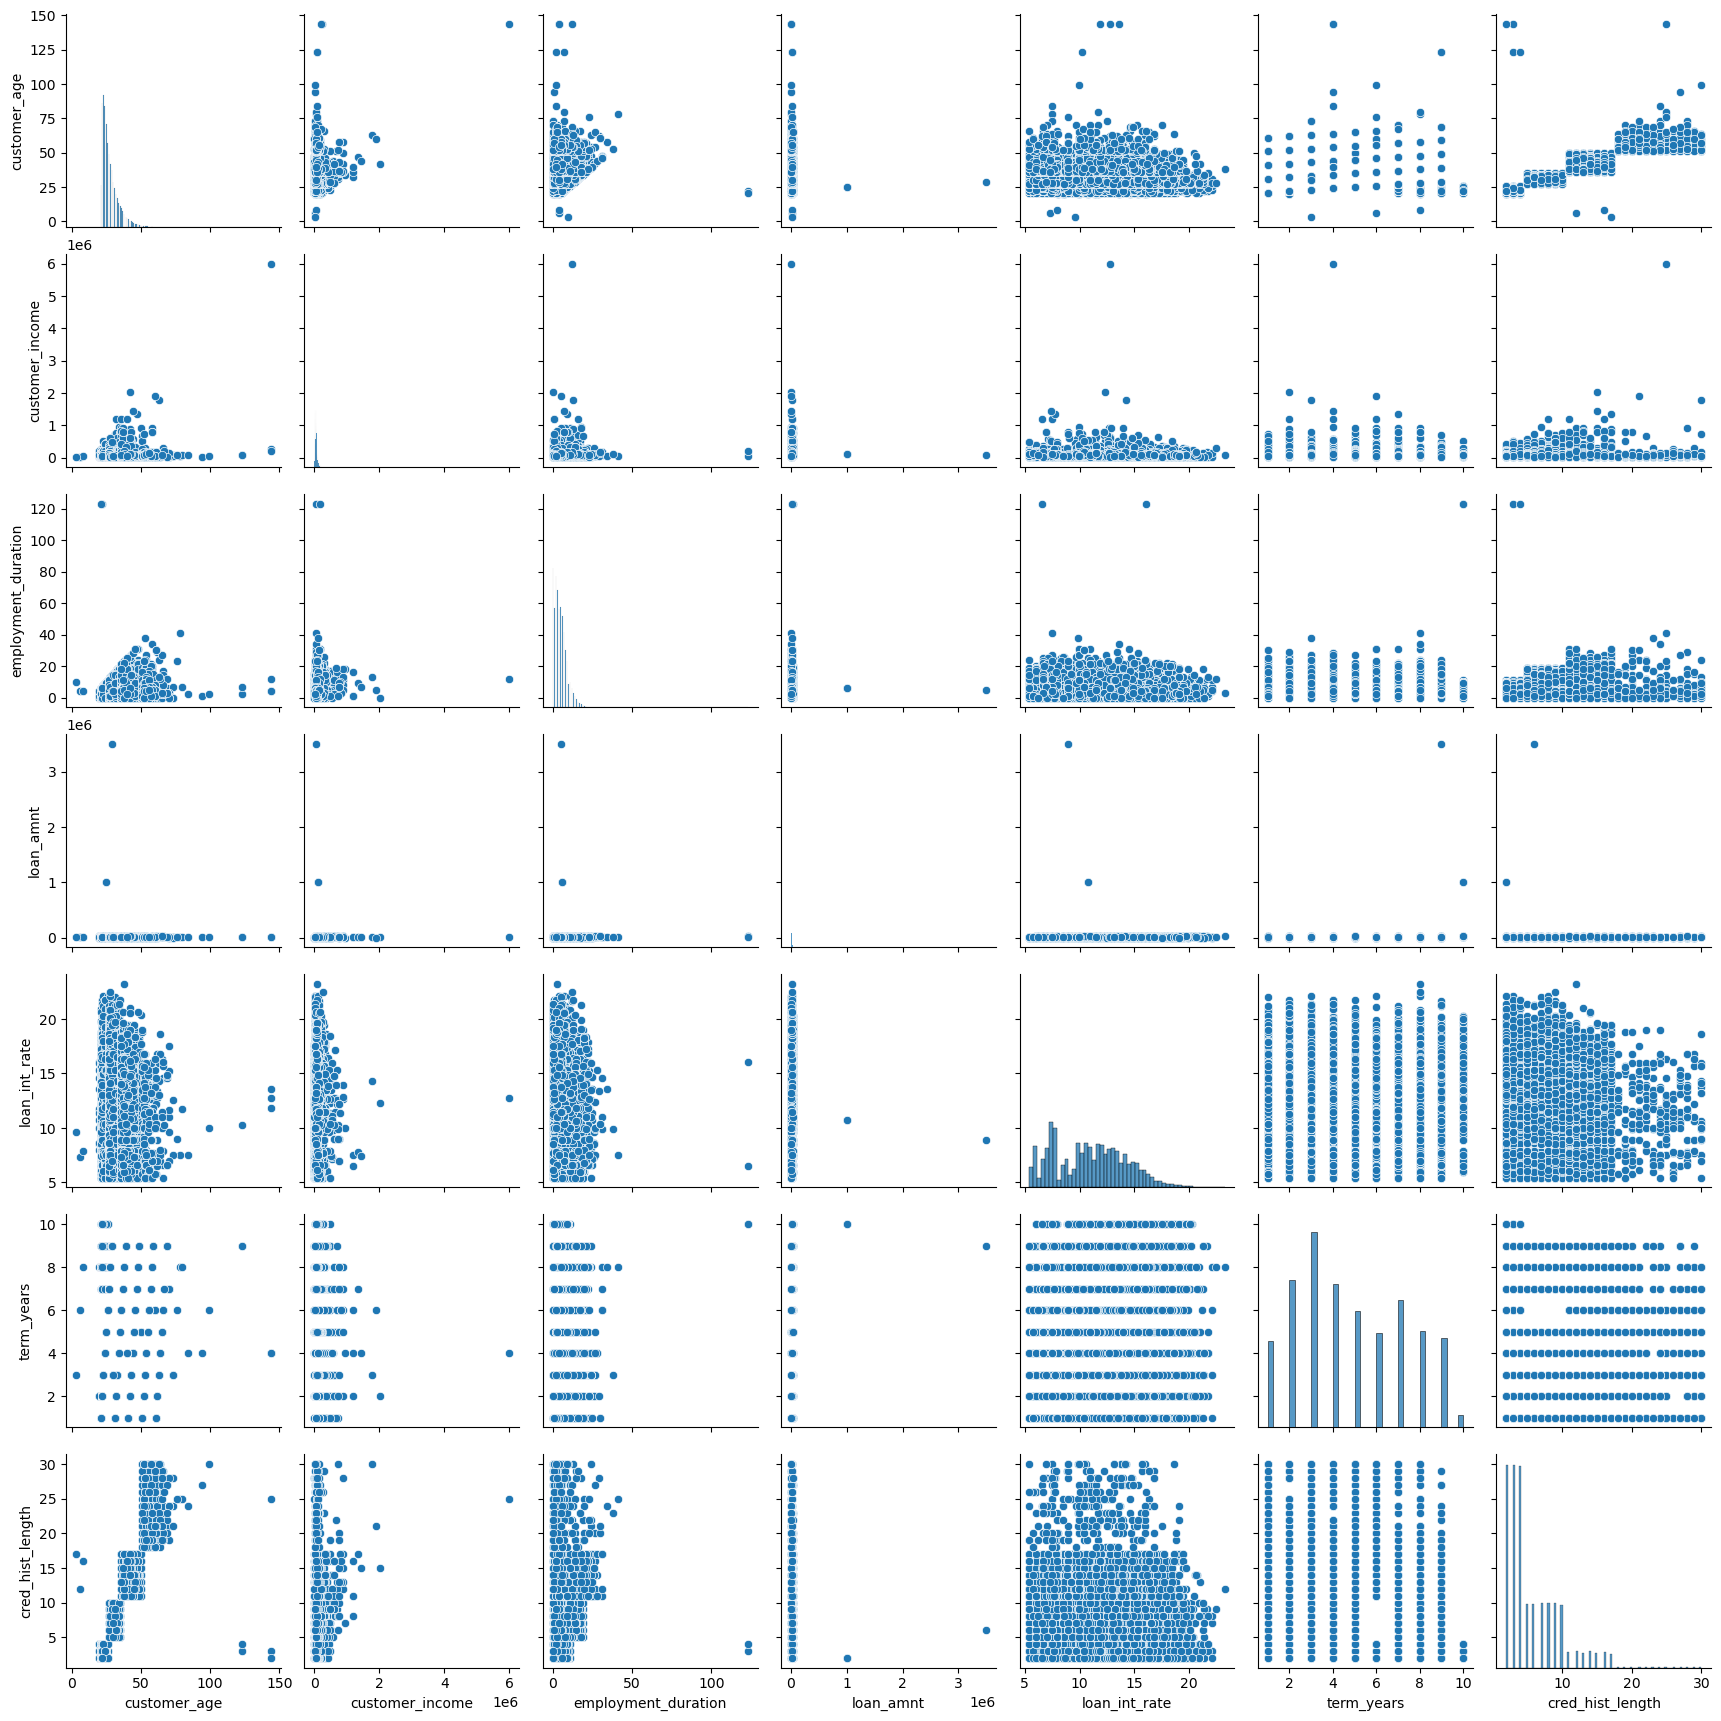

In [10]:
sns.pairplot(df)

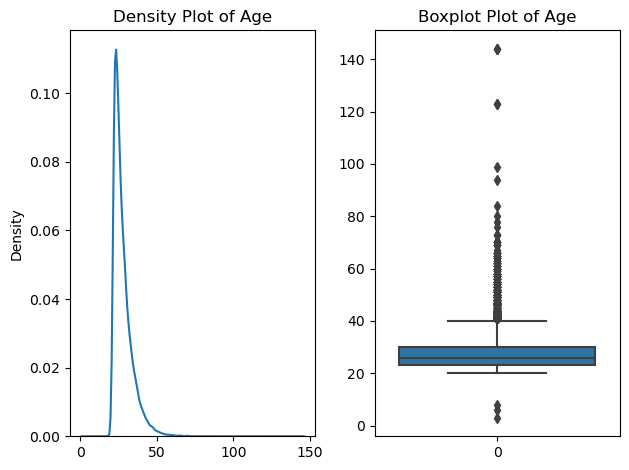

In [11]:
fig,ax = plt.subplots(1,2)
sns.kdeplot(df['customer_age'],ax=ax[0])
sns.boxplot(df['customer_age'],ax=ax[1])
ax[0].set_xlabel("")
ax[1].set_xlabel("")
ax[0].set_title("Density Plot of Age")
ax[1].set_title("Boxplot Plot of Age")
plt.tight_layout()

##### Above graphs are showing outliers in `Age` column so cliping it to `100`

In [12]:
df.loc[df['customer_age']>100,'customer_age']=100
df.loc[df['customer_age']==100,'customer_age'].count()

5

C:\Users\Mubashir\AppData\Local\Temp\ipykernel_9108\2011325390.py:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


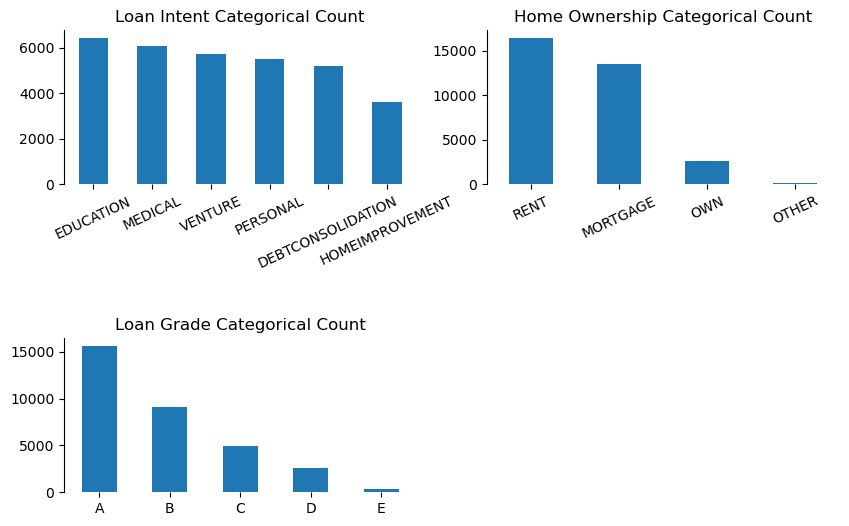

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6),gridspec_kw={'hspace': 1})
# Plot the first bar plot
df['loan_intent'].value_counts().plot(kind='bar', ax=axes[0,0])
axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=25)
axes[0,0].set_xlabel("")
axes[0,0].set_title("Loan Intent Categorical Count")
axes[0,0].spines['right'].set_visible(False)
axes[0,0].spines['top'].set_visible(False)
axes[0,0].spines['bottom'].set_visible(False)

df['home_ownership'].value_counts().plot(kind='bar', ax=axes[0,1])
axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation=25)
axes[0,1].set_xlabel("")
axes[0,1].set_title("Home Ownership Categorical Count")
axes[0,1].spines['right'].set_visible(False)
axes[0,1].spines['top'].set_visible(False)
axes[0,1].spines['bottom'].set_visible(False)

df['loan_grade'].value_counts().plot(kind='bar', ax=axes[1,0])
axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(), rotation=0)
axes[1,0].set_xlabel("")
axes[1,0].set_title("Loan Grade Categorical Count")
axes[1,0].spines['right'].set_visible(False)
axes[1,0].spines['top'].set_visible(False)
axes[1,0].spines['bottom'].set_visible(False)

# Hide the fourth subplot (axes[1, 1])
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()


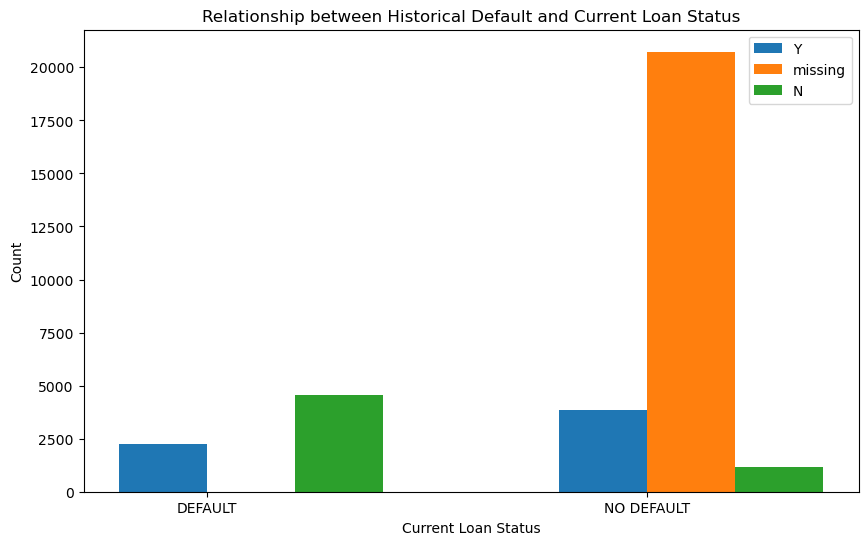

In [14]:
import matplotlib.pyplot as plt

historical_default_values = df['historical_default'].unique()
current_status_values = df['Current_loan_status'].unique()

# Count occurrences of each combination of historical_default and Current_loan_status
count_matrix = []
for hd in historical_default_values:
    counts = [len(df[(df['historical_default'] == hd) & (df['Current_loan_status'] == cs)]) for cs in current_status_values]
    count_matrix.append(counts)

# Plotting the grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.2
x = range(len(current_status_values))

for i, hd in enumerate(historical_default_values):
    ax.bar([p + i * bar_width for p in x], count_matrix[i], bar_width, label=hd)

ax.set_xlabel('Current Loan Status')
ax.set_ylabel('Count')
ax.set_title('Relationship between Historical Default and Current Loan Status')
ax.set_xticks([p + 0.5 * bar_width for p in x])
ax.set_xticklabels(current_status_values)
ax.legend()

plt.show()


- The graph does not effectively convey the relationship between `historical defaulters` and `current default status`.

Text(0.5, 0.98, 'Age vs. Current Loan Status')

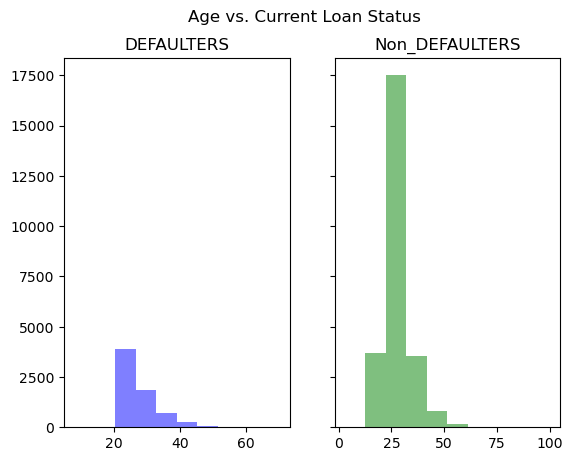

In [15]:
# plt.hist(df[df['Current_loan_status']=='DEFAULT']["customer_age"],bins=10)
fig, ax = plt.subplots(1,2,sharey=True)
# max_count = max(ax[0].get_ylim()[1], ax[1].get_ylim()[1])
# ax[0].set_ylim(0, max_count)
# ax[1].set_ylim(0, max_count)

ax[0].hist(df[df['Current_loan_status']=='DEFAULT']["customer_age"], bins=10, alpha=0.5, color="blue", label="DEFAULT")
ax[1].hist(df[df['Current_loan_status']=='NO DEFAULT']["customer_age"], bins=10, alpha=0.5, color="green", label="No DEFAULT")

ax[0].set_title("DEFAULTERS")
ax[1].set_title("Non_DEFAULTERS",)
# ax.set_ylabel("Count of passengers")

fig.suptitle("Age vs. Current Loan Status")

# ax.legend();

- Although a significant number of defaulters fall within the `20-30` age range, it's important to note that this demographic doesn't necessarily represent the majority of individuals within that age group who are defaulting.

Text(0.5, 0.98, 'Customer Income vs Current Loan Status')

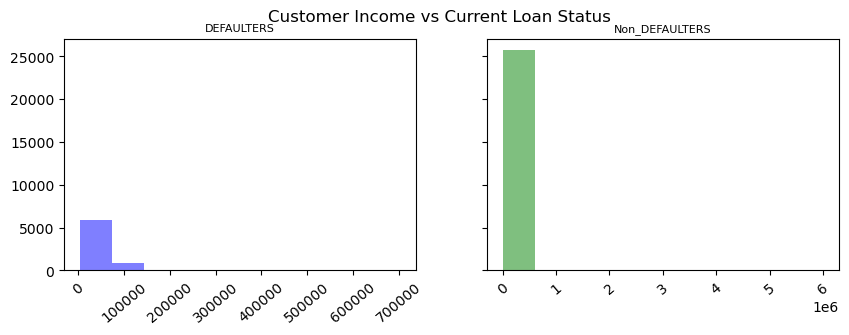

In [16]:

fig, ax = plt.subplots(1,2,figsize=(10,3),sharey=True)

ax[0].hist(df[df['Current_loan_status']=='DEFAULT']["customer_income"], bins=10, alpha=0.5, color="blue", label="DEFAULT")
ax[1].hist(df[df['Current_loan_status']=='NO DEFAULT']["customer_income"], bins=10, alpha=0.5, color="green", label="No DEFAULT")

# Set subplot titles with reduced font size
# ax[0].set_title("Default Customer Income Distribution", fontsize=12)
# ax[1].set_title("Non-Default Customer Income Distribution", fontsize=12)

ax[0].set_title("DEFAULTERS",fontsize=8)
ax[1].set_title("Non_DEFAULTERS",fontsize=8)

ax[0].tick_params(axis='x', rotation=40)
ax[1].tick_params(axis='x', rotation=40)
# ax.set_ylabel("Count of passengers")

fig.suptitle("Customer Income vs Current Loan Status")

# ax.legend();

<Axes: xlabel='customer_income', ylabel='loan_amnt'>

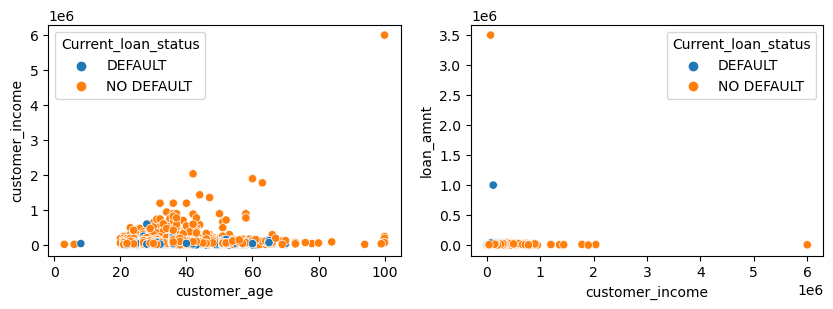

In [17]:
fig,ax = plt.subplots(1,2,figsize=(10,3))
sns.scatterplot(df,x="customer_age",y= "customer_income",hue='Current_loan_status',ax=ax[0])
sns.scatterplot(df,x="customer_income",y= "loan_amnt",hue='Current_loan_status',ax=ax[1])
# sns.scatterplot()

EDA Does not shows any relation between `customer age` and `customer income`

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32582 entries, 0 to 32585
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_age         32582 non-null  int64  
 1   customer_income      32582 non-null  int32  
 2   home_ownership       32582 non-null  object 
 3   employment_duration  31687 non-null  float64
 4   loan_intent          32582 non-null  object 
 5   loan_grade           32582 non-null  object 
 6   loan_amnt            32581 non-null  float64
 7   loan_int_rate        29467 non-null  float64
 8   term_years           32582 non-null  int64  
 9   historical_default   32582 non-null  object 
 10  cred_hist_length     32582 non-null  int64  
 11  Current_loan_status  32582 non-null  object 
dtypes: float64(3), int32(1), int64(3), object(5)
memory usage: 4.1+ MB


In [36]:
object_columns = df.select_dtypes(include=['object']).columns.tolist()
for i in object_columns[:-1]:
    print("Col : ",i,'---->',df[i].isnull().sum())
    print(df[i].unique(),"\n")
    

Col :  home_ownership ----> 0
['RENT' 'OWN' 'MORTGAGE' 'OTHER'] 

Col :  loan_intent ----> 0
['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION'] 

Col :  loan_grade ----> 0
['C' 'A' 'B' 'D' 'E'] 

Col :  historical_default ----> 0
['Y' 'missing' 'N'] 



In [37]:
le = LabelEncoder()
df["Current_loan_status"] = le.fit_transform(df["Current_loan_status"])
df_encoded = pd.get_dummies(df,columns= object_columns[:-1])
df_encoded

,customer_age,customer_income,employment_duration,loan_amnt,loan_int_rate,term_years,cred_hist_length,Current_loan_status,home_ownership_MORTGAGE,home_ownership_OTHER,...,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,historical_default_N,historical_default_Y,historical_default_missing
0,22,59000,123.0,35000.0,16.02,10,3,0,False,False,...,True,False,False,False,True,False,False,False,True,False
1,21,9600,5.0,1000.0,11.14,1,2,1,False,False,...,False,False,True,False,False,False,False,False,False,True
2,25,9600,1.0,5500.0,12.87,5,3,0,True,False,...,False,False,False,True,False,False,False,True,False,False
3,23,65500,4.0,35000.0,15.23,10,2,0,False,False,...,False,False,False,True,False,False,False,True,False,False
4,24,54400,8.0,35000.0,14.27,10,4,0,False,False,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32581,57,53000,1.0,5800.0,13.16,7,30,1,True,False,...,True,False,False,False,True,False,False,False,False,True
32582,54,120000,4.0,17625.0,7.49,4,19,1,True,False,...,True,False,True,False,False,False,False,False,False,True
32583,65,76000,3.0,35000.0,10.99,5,28,0,False,False,...,False,False,False,True,False,False,False,True,False,False
32584,56,150000,5.0,15000.0,11.48,6,26,1,True,False,...,True,False,False,True,False,False,False,False,False,True


<Axes: >

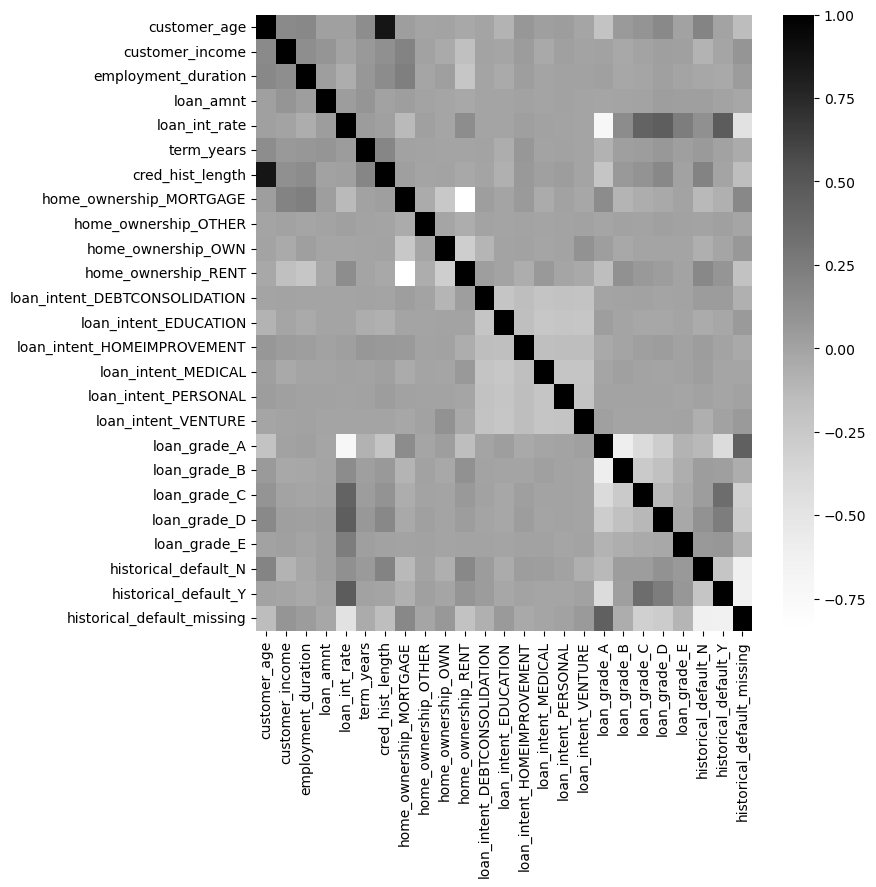

In [54]:
fig,ax = plt.subplots(1,1,figsize=(8,8))
sns.heatmap(df_encoded.drop(columns=["Current_loan_status"]).corr(),cmap='Greys',ax=ax) 

In [56]:
df_encoded.drop(columns=["Current_loan_status"]).corr()['customer_age'].sort_values()

loan_grade_A                    -0.199266
historical_default_missing      -0.152766
loan_intent_EDUCATION           -0.091493
home_ownership_RENT             -0.030044
loan_intent_VENTURE             -0.012648
loan_intent_DEBTCONSOLIDATION   -0.008584
home_ownership_OTHER            -0.008439
home_ownership_OWN              -0.001365
historical_default_Y            -0.001045
loan_grade_E                     0.009954
loan_int_rate                    0.012543
loan_amnt                        0.014583
loan_intent_MEDICAL              0.020630
home_ownership_MORTGAGE          0.032242
loan_intent_PERSONAL             0.033861
loan_grade_B                     0.052350
loan_intent_HOMEIMPROVEMENT      0.075495
loan_grade_C                     0.089634
term_years                       0.137617
customer_income                  0.153510
loan_grade_D                     0.158034
employment_duration              0.164388
historical_default_N             0.194265
cred_hist_length                 0

**The heatmap above indicates a strong correlation between 'customer age' and 'cred_hist_length'. However, the correlation is not strong enough to justify dropping the 'cred_hist_length' column.**